In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv('gdrive/My Drive/DS DSLS/data_fix.csv')

In [4]:
data

,date,time,street,geometry,level,total_records_alerts_cnt,total_records_alerts_avg,total_records_alerts_std,total_records_alerts_p25,total_records_alerts_p50,...,total_records_jams_std,total_records_jams_p25,total_records_jams_p50,total_records_jams_p75,median_level_jams_cnt,median_level_jams_avg,median_level_jams_std,median_level_jams_p25,median_level_jams_p50,median_level_jams_p75
0,2022-07-06,2022-07-06 03:00:00.000,N14 Jenderal Ahmad Yani,"LINESTRING (108.566478 -6.742307, 108.567712 -...",1,40.0,42.250000,21.764179,59.0,59.0,...,7.902390,7.0,7.0,12.0,1286.0,2.652411,0.819807,3.0,3.0,3.0
1,2022-07-06,2022-07-06 06:00:00.000,N14 Jenderal Sudirman,"MULTILINESTRING ((108.538466 -6.754245, 108.53...",2,33.0,19.939394,10.571008,21.0,21.0,...,18.421277,9.0,9.0,20.0,1328.0,2.038404,0.873732,2.0,2.0,3.0
2,2022-07-06,2022-07-06 06:00:00.000,N14 Jenderal Sudirman,"MULTILINESTRING ((108.540309 -6.750729, 108.54...",1,33.0,19.939394,10.571008,21.0,21.0,...,18.421277,9.0,9.0,20.0,1328.0,2.038404,0.873732,2.0,2.0,3.0
3,2022-07-06,2022-07-06 06:00:00.000,N14 Brigjen Darsono,"MULTILINESTRING ((108.541192 -6.734419, 108.54...",3,2.0,61.000000,43.840620,61.0,61.0,...,6.743449,6.0,6.0,11.0,1269.0,2.928290,0.658884,3.0,3.0,3.0
4,2022-07-06,2022-07-06 06:00:00.000,N14 Brigjen Darsono,"LINESTRING (108.538898 -6.726917, 108.539027 -...",4,2.0,61.000000,43.840620,61.0,61.0,...,6.743449,6.0,6.0,11.0,1269.0,2.928290,0.658884,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17595,2022-09-06,2022-09-06 00:00:00.000,N14 Jenderal Ahmad Yani,"MULTILINESTRING ((108.552249 -6.74035, 108.553...",3,40.0,42.250000,21.764179,59.0,59.0,...,7.902390,7.0,7.0,12.0,1286.0,2.652411,0.819807,3.0,3.0,3.0
17596,2022-09-06,2022-09-06 00:00:00.000,N14 Jenderal Ahmad Yani,"MULTILINESTRING ((108.548133 -6.739574, 108.54...",2,40.0,42.250000,21.764179,59.0,59.0,...,7.902390,7.0,7.0,12.0,1286.0,2.652411,0.819807,3.0,3.0,3.0
17597,2022-09-06,2022-09-06 00:00:00.000,N14 Brigjen Darsono,"MULTILINESTRING ((108.540233 -6.73113, 108.540...",3,2.0,61.000000,43.840620,61.0,61.0,...,6.743449,6.0,6.0,11.0,1269.0,2.928290,0.658884,3.0,3.0,3.0
17598,2022-09-06,2022-09-06 00:00:00.000,N14 Jenderal Ahmad Yani,"LINESTRING (108.557466 -6.741308, 108.558148 -...",1,40.0,42.250000,21.764179,59.0,59.0,...,7.902390,7.0,7.0,12.0,1286.0,2.652411,0.819807,3.0,3.0,3.0


## Train Test Split

In [5]:
X = data.iloc[:, 5:83]
y = data[['level']]

In [6]:
#Library for Data Preprocessing
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

## Feature Scaling

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Modelling

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [10]:
# Create function to run different models and return rmse
def modeling(X_train, X_test, y_train, y_test):
    models = []
    models.append(('LR', LinearRegression()))
    models.append(('KNN', KNeighborsRegressor()))
    models.append(('DT', DecisionTreeRegressor(random_state = 1)))
    models.append(('RF', RandomForestRegressor(random_state = 1)))
    models.append(('GB', MultiOutputRegressor(GradientBoostingRegressor(random_state = 1))))
#    models.append(('RG-SVR', RegressorChain(SVR())))

    #Evaluate each model in turn
    names = []
    rmses = []
    
    for name, model in models:
#    cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
#    cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
        model.fit (X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error (y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        print (f'{name} : mse {mse} - rmse {rmse} - mae {mae} - mape {mape*100}')
        names.append(name)
        rmses.append(rmse)
    return names, rmses

In [11]:
# run modeling function on scaled data
print ("Scaled Data Modeling :")
names, rmses = modeling (X_train, X_test, y_train, y_test)

Scaled Data Modeling :
LR : mse 6.547306367400203e+20 - rmse 25587704796.249706 - mae 19317622495.37724 - mape 854762395861.0549
KNN : mse 0.6234242424242424 - rmse 0.789572189495199 - mae 0.6110606060606061 - mape 29.02809343434344
DT : mse 0.5794070853041848 - rmse 0.7611879434832011 - mae 0.603882209091912 - mape 29.081198971128885
RF : mse 0.5790138061784355 - rmse 0.7609295671600858 - mae 0.6039004409904616 - mape 29.00538625938366
GB : mse 0.5783955082183602 - rmse 0.7605231805923868 - mae 0.6013499742668279 - mape 28.900926790652314


Text(0.5, 0, 'PCA feature')

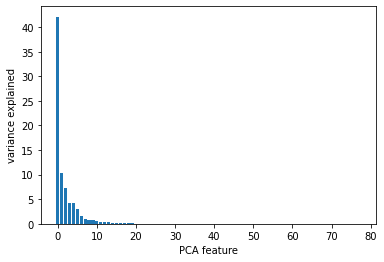

In [12]:
# We create PCA and plot variance explained
pca = PCA()
pca.fit_transform(X_train)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.ylabel('variance explained')
plt.xlabel('PCA feature')

Text(0, 0.5, 'cumulative variance ratio')

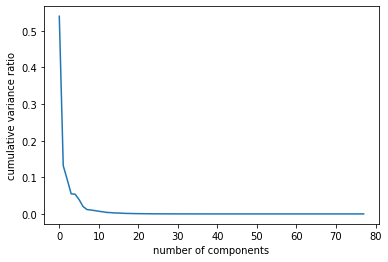

In [13]:
# We also plot the explained variance ratio.
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative variance ratio')

(0.0, 1.1)

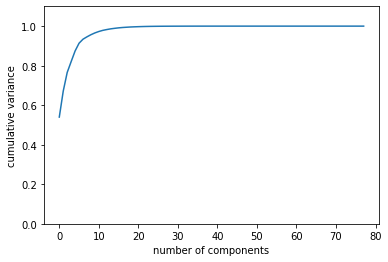

In [14]:
# We also plot the cumultive explained variance ratio.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance')
plt.ylim([0,1.1])

In [15]:
print ("Number of components with explained variance ratio >= 0.01 :", (pca.explained_variance_ratio_>=0.05).sum())
print (f"Total explained variance retained : {pca.explained_variance_ratio_[:np.sum(pca.explained_variance_ratio_>=.01)].sum():2.4f}")

Number of components with explained variance ratio >= 0.01 : 5
Total explained variance retained : 0.9566


In [16]:
# create a pca dataframe based on 95% explained variance retained 
pca = PCA(n_components=.95).fit(X_train)
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)
col_lst = []
for i in range(0,pca_train.shape[1]):
    col_lst.append(f'PC{i}')
    
X_pca_train = pd.DataFrame(pca_train,columns=col_lst)
X_pca_test = pd.DataFrame(pca_test,columns=col_lst)
X_pca_train.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.748658,1.130052,-2.051038,3.349475,1.280453,0.655038,1.231923,0.155803,-1.714103
1,9.315608,-0.880136,-0.823213,-0.950790,-0.338191,-3.074728,-0.248631,0.830848,0.381923
2,-5.931539,1.471687,3.738226,2.296319,1.750578,-2.982771,0.012040,-0.017773,0.825785
3,-0.338228,1.682974,-4.819279,0.076577,0.244397,0.711504,-0.081375,-0.305761,-0.606823
4,-0.965191,2.301399,2.867650,0.201286,3.521696,1.357199,-0.402099,-1.081931,-0.994900


In [17]:
# run modeling function on pca data
print ("PCA Data Modeling :")
pca_names, pca_rmses = modeling (X_pca_train, X_pca_test, y_train, y_test)

PCA Data Modeling :
LR : mse 0.5881865079419029 - rmse 0.7669331834924753 - mae 0.6097092474138127 - mape 29.301598635560904
KNN : mse 0.6749848484848485 - rmse 0.8215746152875273 - mae 0.66 - mape 30.98453282828283
DT : mse 0.59361533328076 - rmse 0.7704643621094749 - mae 0.616040503727223 - mape 29.157985917398683
RF : mse 0.6041241803355781 - rmse 0.7772542572000349 - mae 0.6207992683345205 - mape 29.495063367288214
GB : mse 0.5937495837393757 - rmse 0.7705514802655146 - mae 0.6245862075454481 - mape 29.976126347726158


## Hyperparameter Tuning

In [18]:
def hyperparameter_tuning(X_train, y_train, model_name):
    if model_name == 'Linear Regression':
        model = LinearRegression()
        parameters = {'normalize': [True, False]}
    elif model_name == 'K-Nearest Neighbors Regression':
        model = KNeighborsRegressor()
        parameters = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    elif model_name == 'Decision Tree Regression':
        model = DecisionTreeRegressor()
        parameters = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
    elif model_name == 'Random Forest Regression':
        model = RandomForestRegressor()
        parameters = {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
    elif model_name == 'Gradient Boosting Regression':
        model = GradientBoostingRegressor()
        parameters = {'n_estimators': [100, 200, 500], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 5, 10]}

    clf = GridSearchCV(model, parameters, cv=5, n_jobs=-1)
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:"+'_'+model_name)
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    return clf.best_estimator_

In [19]:
# Perform hyperparameter tuning for Linear Regression
best_linear_reg = hyperparameter_tuning(X_train, y_train, 'Linear Regression')

# Perform hyperparameter tuning for K-Nearest Neighbors Regression
best_knn_reg = hyperparameter_tuning(X_train, y_train, 'K-Nearest Neighbors Regression')

# Perform hyperparameter tuning for Decision Tree Regression
best_decision_tree_reg = hyperparameter_tuning(X_train, y_train, 'Decision Tree Regression')

# Perform hyperparameter tuning for Random Forest Regression
best_random_forest_reg = hyperparameter_tuning(X_train, y_train, 'Random Forest Regression')

# Perform hyperparameter tuning for Gradient Boosting Regression
best_gradient_boosting_reg = hyperparameter_tuning(X_train, y_train, 'Gradient Boosting Regression')

Best parameters set found on development set:_Linear Regression
{'normalize': True}

Grid scores on development set:
0.249 (+/-0.036) for {'normalize': True}
0.249 (+/-0.037) for {'normalize': False}

Best parameters set found on development set:_K-Nearest Neighbors Regression
{'n_neighbors': 7, 'weights': 'uniform'}

Grid scores on development set:
0.107 (+/-0.044) for {'n_neighbors': 3, 'weights': 'uniform'}
0.106 (+/-0.043) for {'n_neighbors': 3, 'weights': 'distance'}
0.111 (+/-0.062) for {'n_neighbors': 5, 'weights': 'uniform'}
0.109 (+/-0.062) for {'n_neighbors': 5, 'weights': 'distance'}
0.152 (+/-0.062) for {'n_neighbors': 7, 'weights': 'uniform'}
0.150 (+/-0.062) for {'n_neighbors': 7, 'weights': 'distance'}

Best parameters set found on development set:_Decision Tree Regression
{'max_depth': 5, 'min_samples_split': 5}

Grid scores on development set:
0.248 (+/-0.031) for {'max_depth': None, 'min_samples_split': 2}
0.248 (+/-0.031) for {'max_depth': None, 'min_samples_split': 

In [23]:
#Hyperparameter
LR_params = {'normalize': True}
KNN_params = {'n_neighbors': 7, 'weights': 'uniform'}
DT_params = {'max_depth': 5, 'min_samples_split': 5}
RF_params = {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
GB_params = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

In [28]:
# Create function to run different models and return rmse
def modeling_tuning(X_train, X_test, y_train, y_test):
    models = []
    models.append(('LR', LinearRegression(**LR_params)))
    models.append(('KNN', KNeighborsRegressor(**KNN_params)))
    models.append(('DT', DecisionTreeRegressor(**DT_params, random_state = 1)))
    models.append(('RF', RandomForestRegressor(**RF_params, random_state = 1)))
    models.append(('GB', MultiOutputRegressor(GradientBoostingRegressor(**GB_params, random_state = 1))))
#    models.append(('RG-SVR', RegressorChain(SVR())))

    #Evaluate each model in turn
    names = []
    rmses = []
    
    for name, model in models:
#    cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
#    cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
        model.fit (X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error (y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        print (f'{name} : mse {mse} - rmse {rmse} - mae {mae} - mape {mape*100}')
        names.append(name)
        rmses.append(rmse)
    return names, rmses

In [29]:
# run modeling function on scaled data
print ("Scaled Data Modeling After Hyperparameter Tuning:")
names, rmses = modeling_tuning(X_train, X_test, y_train, y_test)

Scaled Data Modeling After Hyperparameter Tuning:
LR : mse 5.9600623289055764e+19 - rmse 7720143994.062272 - mae 6244016206.410629 - mape 285679549907.4949
KNN : mse 0.6238636363636364 - rmse 0.7898503885949771 - mae 0.6324675324675324 - mape 29.360344516594516
DT : mse 0.5759961910259608 - rmse 0.7589441290542808 - mae 0.6032355810886368 - mape 29.065199418949756
RF : mse 0.5766215038888447 - rmse 0.7593559796886074 - mae 0.6025438610762138 - mape 28.9670957344799
GB : mse 0.5775353630237313 - rmse 0.7599574744837577 - mae 0.6014137900196774 - mape 28.90577107978945


In [30]:
# run modeling function on pca data
print ("PCA Data Modeling :")
pca_names, pca_rmses = modeling_tuning(X_pca_train, X_pca_test, y_train, y_test)

PCA Data Modeling :
LR : mse 0.5881865079419031 - rmse 0.7669331834924755 - mae 0.6097092474138125 - mape 29.3015986355609
KNN : mse 0.6522881880024737 - rmse 0.8076436020934442 - mae 0.6505411255411255 - mape 30.65160533910534
DT : mse 0.6161759808469176 - rmse 0.7849687769885613 - mae 0.6296988973260735 - mape 29.63344132489355
RF : mse 0.6043376021126083 - rmse 0.7773915372015625 - mae 0.6226364114812218 - mape 29.566229784738045
GB : mse 0.5934697416276902 - rmse 0.7703698732606891 - mae 0.6199216735342433 - mape 29.591492765357774
